# Importing Packages

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import pandas_profiling
import os, sys

import datetime

In [9]:
from __future__ import division, print_function, unicode_literals

# Data Preperation

In [10]:
#import dataset products.csv (here we use the full dataset)
products = pd.read_csv('products.csv')
products.head()

prod_id                       prod_desc prod_section  \
0  20000002.0  ACSE SS TUNA LT CHUNK IN BROTH      Grocery   
1  20000005.0           ACSE APPLE CIDER 3 LT      Produce   
2  20000069.0                  ACSE WHOLE COD      Seafood   
3  20000086.0          S.S. SR. JUICE BERRIES         Bulk   
4  20000093.0        DANONE ACTIVIA CLUB PACK        Dairy   

               prod_category      prod_subcategory    prod_type  \
0                     Canned      Canned Fish/Meat  Canned Tuna   
1                 Hard Goods  Dressing/Dips/Juices        Juice   
2              Fresh Seafood            Fresh Fish          Cod   
3                 Bulk Foods         Confectionary        Candy   
4  Yogurt/Refrigerated Juice                Yogurt       Health   

  prod_mfc_brand_cd  prod_unit_qty_count prod_count_uom  prod_uom_value  
0              ACSE                  1.0             KG            1.88  
1              ACSE                  1.0              L            3.00  
2              ACSE                  1.0             KG            1.00  
3              SANB                  1.0             UN            1.00  
4              DACT                 24.0              G          100.00

In [11]:
products.shape  #155919 rows, 10 columns

(155919, 10)

In [12]:
#drop na values
products = products.dropna()

In [13]:
products.shape

(152578, 10)

In [14]:
#import transactions dataset (a subset)
transactions = pd.read_csv('transactions_sampled_v5.csv')
transactions = transactions.iloc[: , 1:]
transactions.head()


trans_id   trans_dt  store_id         cust_id     prod_id  \
0  170625010050404567  6/25/2017      1005      1008061498  21031312.0   
1  170624010220809847  6/24/2017      1022      1133995672  20189092.0   
2  170624010100701456  6/24/2017      1010  60003034881280  20708931.0   
3  170624010210702469  6/24/2017      1021      1008762288  20169567.0   
4  170624010660808197  6/24/2017      1066      1148460508  20314333.0   

   sales_amt  sales_qty  sales_wgt  
0       2.49        1.0        0.0  
1       0.05        1.0        0.0  
2      11.99        1.0        0.0  
3       9.00        1.0        0.2  
4      34.38        3.0        0.0

In [17]:
#Negative sales amount and quantity don't make sense, filter out those rows
transactions.drop(transactions[transactions['sales_amt'] <= 0].index, inplace = True)
transactions.drop(transactions[transactions['sales_qty'] <= 0].index, inplace = True)

In [18]:
transactions.shape

(8196410, 8)

In [19]:
merged = transactions.merge(products, how="inner", on="prod_id")

merged.head()

trans_id   trans_dt  store_id     cust_id     prod_id  sales_amt  \
0  170625010050404567  6/25/2017      1005  1008061498  21031312.0       2.49   
1  170624010190805778  6/24/2017      1019  1100611737  21031312.0       2.49   
2  170624010010806725  6/24/2017      1001  1016601259  21031312.0       2.49   
3  170624010270807847  6/24/2017      1027  1021650510  21031312.0       2.49   
4  170625010040707767  6/25/2017      1004  1128987709  21031312.0       2.49   

   sales_qty  sales_wgt                   prod_desc   prod_section  \
0        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
1        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
2        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
3        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
4        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   

   prod_category      prod_subcategory prod_type prod_mfc_brand_cd  \
0  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
1  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
2  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
3  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
4  Natural Foods  Snacks-Natural Foods     Chips              QUPA   

   prod_unit_qty_count prod_count_uom  prod_uom_value  
0                  1.0              G           300.0  
1                  1.0              G           300.0  
2                  1.0              G           300.0  
3                  1.0              G           300.0  
4                  1.0              G           300.0

In [20]:
merged.shape

(8113670, 17)

In [21]:
merged.isna().sum() 

trans_id               0
trans_dt               0
store_id               0
cust_id                0
prod_id                0
sales_amt              0
sales_qty              0
sales_wgt              0
prod_desc              0
prod_section           0
prod_category          0
prod_subcategory       0
prod_type              0
prod_mfc_brand_cd      0
prod_unit_qty_count    0
prod_count_uom         0
prod_uom_value         0
dtype: int64

In [22]:
merged['year'] = merged.trans_dt.str[-4:]

In [23]:
merged.head()

trans_id   trans_dt  store_id     cust_id     prod_id  sales_amt  \
0  170625010050404567  6/25/2017      1005  1008061498  21031312.0       2.49   
1  170624010190805778  6/24/2017      1019  1100611737  21031312.0       2.49   
2  170624010010806725  6/24/2017      1001  1016601259  21031312.0       2.49   
3  170624010270807847  6/24/2017      1027  1021650510  21031312.0       2.49   
4  170625010040707767  6/25/2017      1004  1128987709  21031312.0       2.49   

   sales_qty  sales_wgt                   prod_desc   prod_section  \
0        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
1        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
2        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
3        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
4        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   

   prod_category      prod_subcategory prod_type prod_mfc_brand_cd  \
0  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
1  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
2  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
3  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
4  Natural Foods  Snacks-Natural Foods     Chips              QUPA   

   prod_unit_qty_count prod_count_uom  prod_uom_value  year  
0                  1.0              G           300.0  2017  
1                  1.0              G           300.0  2017  
2                  1.0              G           300.0  2017  
3                  1.0              G           300.0  2017  
4                  1.0              G           300.0  2017

In [24]:
merged['unit_price'] = merged['sales_amt']/merged['sales_qty']

In [25]:
#remove products which has no price change among years, in other words, the max price equal to the minimum price
price_range = merged.groupby(['prod_id'])['unit_price'].agg(['max','min','mean']).reset_index()
no_change_idx = price_range.loc[round(price_range['min'],3) == round(price_range['max'],3)]['prod_id']

In [26]:
no_change_idx

3        2.000012e+07
8        2.000022e+07
13       2.000037e+07
14       2.000038e+07
17       2.000046e+07
             ...     
77870    2.121442e+10
77871    2.121442e+10
77872    2.121442e+10
77874    2.121621e+10
77875    2.121815e+10
Name: prod_id, Length: 23761, dtype: float64

In [27]:
print("Total count of unique prod_ids in ACSE: ", len(products.prod_id.unique())) #152578
print("Total count of unique prod_ids we have considered: ", len(merged.prod_id.unique())) # 93074
print("Count of prod_id with no price change: ", len(no_change_idx)) #28375 -> 28701 (after rounding to 4 decimal places)

Total count of unique prod_ids in ACSE:  152578
Total count of unique prod_ids we have considered:  77876
Count of prod_id with no price change:  23761


In [28]:
df = merged[~merged.prod_id.isin(no_change_idx)]

print("Shape of df with all prices: ", merged.shape)
print("Shape of df with only fluctuating prices: ", df.shape)

Shape of df with all prices:  (8113670, 19)
Shape of df with only fluctuating prices:  (7987352, 19)


In [20]:
print("No. of prod_id: ", merged.prod_id.nunique())
print("No. of prod_id with fluctuating prices: ", df.prod_id.nunique())

No. of prod_id:  93074
No. of prod_id with fluctuating prices:  64373


# product category level

In [29]:
#Next, select product categories that counts for 80% of sales
total_sales = sum(df['sales_amt'])
print(total_sales)
category_sale = df.groupby(['prod_category'])['sales_amt'].agg('sum').sort_values(ascending = False)

sort_data = round(category_sale/total_sales,4)

41835950.48868044


In [30]:
sort_data

prod_category
Vegetables               0.0909
Fruit                    0.0716
Natural Foods            0.0623
Snacks                   0.0381
HMR                      0.0340
                          ...  
Dollar Shop              0.0000
Fresh Service Case       0.0000
Gaming                   0.0000
Spirits                  0.0000
Restaurant Disposable    0.0000
Name: sales_amt, Length: 80, dtype: float64

In [31]:
#calculate the cumulated persentage of sales amount
sort_data1 = sort_data.cumsum().reset_index()

In [32]:
#make a plot of accumulated percentage
import matplotlib.pyplot as plt
x = sort_data1.index.values
y = sort_data1.sales_amt

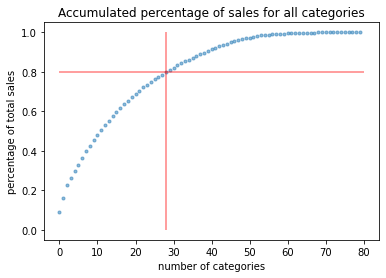

In [33]:
import matplotlib.pyplot as plt
area = np.pi*3
plt.scatter(x, y, s = area, alpha=0.5)
plt.title('Accumulated percentage of sales for all categories')
plt.xlabel('number of categories')
plt.ylabel('percentage of total sales')
plt.hlines(0.80,0,80,color = "red",alpha=0.5)
plt.vlines(28,0,1,color = "red",alpha=0.5)
plt.show()

In [34]:
#The plot shows that top 28 product categories account for about 80% sales. This could limit our product selection range
sort_data1.iloc[0:28]

prod_category  sales_amt
0                    Vegetables     0.0909
1                         Fruit     0.1625
2                 Natural Foods     0.2248
3                        Snacks     0.2629
4                           HMR     0.2969
5                      In-Store     0.3309
6                    Fresh Beef     0.3643
7                 Fresh-Poultry     0.3972
8                   Milk & Eggs     0.4257
9                Cold Beverages     0.4538
10      Cheese/Butter/Margarine     0.4815
11                  Deli Cheese     0.5068
12    Yogurt/Refrigerated Juice     0.5304
13                    Deli Meat     0.5529
14     Household Cleaning Needs     0.5741
15                   Commercial     0.5953
16                  Meal Makers     0.6158
17                       Savory     0.6355
18                        Sweet     0.6537
19                    Breakfast     0.6716
20                       Baking     0.6884
21  Hot Beverages & Accessories     0.7051
22                       Canned     0.7209
23            Frozen Boxed Meat     0.7347
24     Household Paper Products     0.7483
25                    Processed     0.7612
26                    Salad Bar     0.7740
27                Gourmet Foods     0.7861

In [35]:
sort_data1.prod_category.nunique()

80

In [36]:
28/80  #80% of sales comes from 35% of product categories (28)

0.35

In [37]:
sort_data2 = sort_data1.iloc[0:28].prod_category.values

In [38]:
df.shape

(7987352, 19)

In [39]:
df1 = df[df.prod_category.isin(sort_data2)]

In [40]:
df1.head()

trans_id   trans_dt  store_id     cust_id     prod_id  sales_amt  \
0  170625010050404567  6/25/2017      1005  1008061498  21031312.0       2.49   
1  170624010190805778  6/24/2017      1019  1100611737  21031312.0       2.49   
2  170624010010806725  6/24/2017      1001  1016601259  21031312.0       2.49   
3  170624010270807847  6/24/2017      1027  1021650510  21031312.0       2.49   
4  170625010040707767  6/25/2017      1004  1128987709  21031312.0       2.49   

   sales_qty  sales_wgt                   prod_desc   prod_section  \
0        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
1        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
2        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
3        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
4        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   

   prod_category      prod_subcategory prod_type prod_mfc_brand_cd  \
0  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
1  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
2  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
3  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
4  Natural Foods  Snacks-Natural Foods     Chips              QUPA   

   prod_unit_qty_count prod_count_uom  prod_uom_value  year  unit_price  
0                  1.0              G           300.0  2017        2.49  
1                  1.0              G           300.0  2017        2.49  
2                  1.0              G           300.0  2017        2.49  
3                  1.0              G           300.0  2017        2.49  
4                  1.0              G           300.0  2017        2.49

In [41]:
df1.shape

(6560974, 19)

In [42]:
type(df1.trans_dt)

pandas.core.series.Series

In [43]:
from datetime import datetime
df1["trans_dt"] = pd.to_datetime(df1["trans_dt"])

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2585611742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["trans_dt"] = pd.to_datetime(df1["trans_dt"])


In [44]:
df1['week'] = df1['trans_dt'].dt.isocalendar().week

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/548247152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['week'] = df1['trans_dt'].dt.isocalendar().week


In [45]:
df1.head()

trans_id   trans_dt  store_id     cust_id     prod_id  sales_amt  \
0  170625010050404567 2017-06-25      1005  1008061498  21031312.0       2.49   
1  170624010190805778 2017-06-24      1019  1100611737  21031312.0       2.49   
2  170624010010806725 2017-06-24      1001  1016601259  21031312.0       2.49   
3  170624010270807847 2017-06-24      1027  1021650510  21031312.0       2.49   
4  170625010040707767 2017-06-25      1004  1128987709  21031312.0       2.49   

   sales_qty  sales_wgt                   prod_desc   prod_section  \
0        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
1        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
2        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
3        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   
4        1.0        0.0  QP TORTILLA CHIPS RED CORN  Natural Foods   

   prod_category      prod_subcategory prod_type prod_mfc_brand_cd  \
0  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
1  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
2  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
3  Natural Foods  Snacks-Natural Foods     Chips              QUPA   
4  Natural Foods  Snacks-Natural Foods     Chips              QUPA   

   prod_unit_qty_count prod_count_uom  prod_uom_value  year  unit_price  week  
0                  1.0              G           300.0  2017        2.49    25  
1                  1.0              G           300.0  2017        2.49    25  
2                  1.0              G           300.0  2017        2.49    25  
3                  1.0              G           300.0  2017        2.49    25  
4                  1.0              G           300.0  2017        2.49    25

In [46]:
df1.prod_desc.value_counts()

BANANA                               131544
CUCUMBER ENGLISH                      39966
ACSE GRADE A EGGS LARGE WHITE, EA     33668
BROCCOLI                              29050
PEPPERS RED SWEET                     28856
                                      ...  
ACSE CHOCOLATE RASPBERRY CRUNCH           2
JOE'S CLASSIC BBQ CHIPS                   2
ACSE NNN SWEET CORN COBBETTES 12          2
NUGO SLIM RSPBERRY TRUFFLE BAR            2
ACSE CAESAR SALAD ICEBERG SMALL           2
Name: prod_desc, Length: 26441, dtype: int64

In [47]:
df1[df1['prod_id'] == 20000100]

trans_id   trans_dt  store_id         cust_id     prod_id  \
7433735  171208010402600440 2017-12-08      1040      1012487495  20000100.0   
7433736  180117010502003820 2018-01-17      1050  60003045992650  20000100.0   
7433737  180712010511001276 2018-07-12      1051      1125202074  20000100.0   
7433738  190317010511000874 2019-03-17      1051      1131044622  20000100.0   

         sales_amt  sales_qty  sales_wgt                    prod_desc  \
7433735       3.49        1.0        0.0  DION CHILIES MEXICAN GROUND   
7433736       2.99        1.0        0.0  DION CHILIES MEXICAN GROUND   
7433737       2.99        1.0        0.0  DION CHILIES MEXICAN GROUND   
7433738       2.99        1.0        0.0  DION CHILIES MEXICAN GROUND   

        prod_section prod_category prod_subcategory   prod_type  \
7433735      Grocery        Baking    Baking-Spices  Core Spice   
7433736      Grocery        Baking    Baking-Spices  Core Spice   
7433737      Grocery        Baking    Baking-Spices  Core Spice   
7433738      Grocery        Baking    Baking-Spices  Core Spice   

        prod_mfc_brand_cd  prod_unit_qty_count prod_count_uom  prod_uom_value  \
7433735              DION                  1.0              G            39.0   
7433736              DION                  1.0              G            39.0   
7433737              DION                  1.0              G            39.0   
7433738              DION                  1.0              G            39.0   

         year  unit_price  week  
7433735  2017        3.49    49  
7433736  2018        2.99     3  
7433737  2018        2.99    28  
7433738  2019        2.99    11

In [48]:
df1.to_csv('df1.csv', index = False)

# Elasticity

In [49]:
elasticity0 = df1.groupby(["prod_id","week"]).agg({"sales_qty":"sum","unit_price":"mean"}).reset_index()
elasticity0.head()

prod_id  week  sales_qty  unit_price
0  20000100.0     3        1.0        2.99
1  20000100.0    11        1.0        2.99
2  20000100.0    28        1.0        2.99
3  20000100.0    49        1.0        3.49
4  20000128.0     1        1.0       11.99

In [50]:
elasticity = df1.groupby(["prod_id","week"]).agg({"sales_qty":"sum","unit_price":"mean"}).reset_index()
elasticity["sales_qty"] = np.log(elasticity.sales_qty)
elasticity["unit_price"] = np.log(elasticity.unit_price)
elasticity

prod_id  week  sales_qty  unit_price
0       2.000010e+07     3   0.000000    1.095273
1       2.000010e+07    11   0.000000    1.095273
2       2.000010e+07    28   0.000000    1.095273
3       2.000010e+07    49   0.000000    1.249902
4       2.000013e+07     1   0.000000    2.484073
...              ...   ...        ...         ...
813711  2.121537e+10    44   2.079442    1.515127
813712  2.121537e+10    45   0.693147    1.247032
813713  2.121537e+10    46   2.772589    1.765587
813714  2.121537e+10    47   2.397895    1.738710
813715  2.121537e+10    48   0.000000    1.085189

[813716 rows x 4 columns]

In [51]:
# set up a regressor

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [52]:
# calculate elasticity for each prod

table = pd.DataFrame(columns = ["prod_id", "elasticity"])

for i in elasticity.prod_id.unique():
    tmp = elasticity.loc[(elasticity.prod_id == i),:]
    if len(tmp) > 1:
            value = lr.fit(X = tmp.unit_price.values.reshape(-1, 1), y = tmp.sales_qty).coef_[0]
            value = pd.DataFrame([i,value], index = ["prod_id", "elasticity"]).T
            table = table.append(value)
    else:
        continue

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append(value)
C:\Users\geyik\AppData\Local\Temp/ipykernel_9576/2673509213.py:10: FutureWarning

In [53]:
# merge it back to the table

elasticity = elasticity.merge(table, how = "left", on = ["prod_id"])
elasticity

prod_id  week  sales_qty  unit_price elasticity
0          20000100.0     3   0.000000    1.095273        0.0
1          20000100.0    11   0.000000    1.095273        0.0
2          20000100.0    28   0.000000    1.095273        0.0
3          20000100.0    49   0.000000    1.249902        0.0
4          20000128.0     1   0.000000    2.484073   2.220452
...               ...   ...        ...         ...        ...
813711  21215367001.0    44   2.079442    1.515127   4.123367
813712  21215367001.0    45   0.693147    1.247032   4.123367
813713  21215367001.0    46   2.772589    1.765587   4.123367
813714  21215367001.0    47   2.397895    1.738710   4.123367
813715  21215367001.0    48   0.000000    1.085189   4.123367

[813716 rows x 5 columns]

(array([1.5115e+04, 6.5970e+03, 3.3610e+03, 1.5730e+03, 6.0800e+02,
        2.0800e+02, 8.5000e+01, 2.7000e+01, 1.0000e+01, 1.0000e+00]),
 array([0.        , 0.78507285, 1.57014569, 2.35521854, 3.14029138,
        3.92536423, 4.71043707, 5.49550992, 6.28058277, 7.06565561,
        7.85072846]),
 <BarContainer object of 10 artists>)

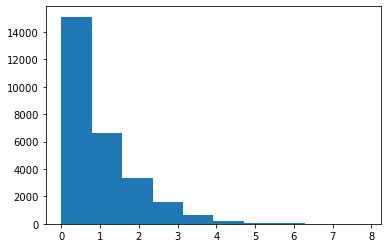

In [54]:
plt.hist(elasticity.groupby(['prod_id']).agg({"sales_qty": "mean"}).reset_index().sales_qty)  

In [55]:
# getting rid of the product ids that have a average sales qty of less than 1 over all the weeks

temp1 = elasticity.groupby(['prod_id']).agg({"sales_qty": "mean"}).reset_index()
temp1[temp1.sales_qty < 1]['prod_id']

elasticity = elasticity[~elasticity.prod_id.isin(temp1[temp1.sales_qty < 1]['prod_id'])]

In [56]:
temp1 = elasticity.groupby(['prod_id']).agg({"unit_price": "mean"}).reset_index().sort_values(by = "unit_price", ascending = True)
temp1[temp1.unit_price < 0]
# ['prod_id']
# temp1

prod_id  unit_price
5183  2.102313e+07   -1.568660
664   2.012158e+07   -1.252963
9168  2.059329e+10   -1.124048
6125  2.110413e+07   -1.114895
6091  2.110282e+07   -1.051768
...            ...         ...
1663  2.035582e+07   -0.010193
751   2.013699e+07   -0.008792
7360  2.018523e+10   -0.002601
7826  2.030386e+10   -0.002328
3562  2.086267e+07   -0.000879

[130 rows x 2 columns]

In [57]:
#top 100 low elasticity products (we hope to raise price)
ela = elasticity[(elasticity.elasticity < -0.0001) & (elasticity.elasticity > -0.1)].sort_values(by = "elasticity",ascending = False)
ela_list1 = np.unique(ela['prod_id'])[0:100]

In [58]:
#testing
ela

prod_id  week  sales_qty  unit_price elasticity
521628  21102877.0    30   1.609438    1.095273   -0.00023
521637  21102877.0    40   2.079442    1.084063   -0.00023
521620  21102877.0    22   1.098612    2.649008   -0.00023
521621  21102877.0    23   0.693147    2.756523   -0.00023
521635  21102877.0    38   1.386294    1.095273   -0.00023
...            ...   ...        ...         ...        ...
200403  20686034.0    31   2.197225    1.160413  -0.096717
200402  20686034.0    30   2.708050    0.879330  -0.096717
200401  20686034.0    29   2.564949    0.638499  -0.096717
200400  20686034.0    28   2.397895    1.082822  -0.096717
200405  20686034.0    33   2.708050    0.779325  -0.096717

[10138 rows x 5 columns]

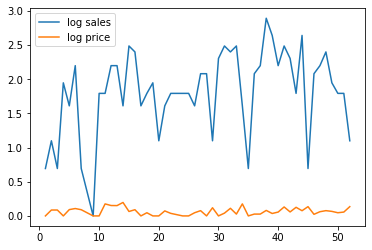

In [59]:
#testing 
# low elasticity
xyz = df1[df1.prod_id == 20297693002].groupby(["prod_id","week"]).agg({"sales_qty":"sum","unit_price":"mean"}).reset_index() #.sort_values(by="week", ascending = True)
xyz
plt.plot(xyz["week"] , np.log(xyz["sales_qty"]), label = "log sales")
plt.plot(xyz["week"] , np.log(xyz["unit_price"]), label = "log price")

# # plt.plot(xyz["week"] , (xyz["sales_qty"]), label = "sales")
# # plt.plot(xyz["week"] , (xyz["unit_price"]), label = "price")

plt.legend()
plt.show()

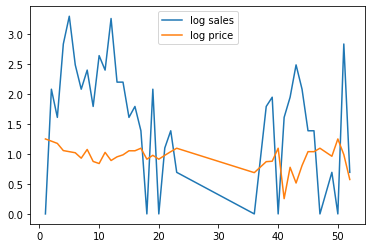

In [60]:
#testing 
# low elasticity
xyz = df1[df1.prod_id == 20050741001].groupby(["prod_id","week"]).agg({"sales_qty":"sum","unit_price":"mean"}).reset_index() #.sort_values(by="week", ascending = True)
plt.plot(xyz["week"] , np.log(xyz["sales_qty"]), label = "log sales")
plt.plot(xyz["week"] , np.log(xyz["unit_price"]), label = "log price")

plt.legend()
plt.show()

In [61]:
#top 50 high elasticity products(every day low price)
ela1 = elasticity[elasticity.elasticity < (-1)].sort_values(by = "elasticity", ascending = True)
ela_list2 = np.unique(ela1['prod_id'])[0:50]

In [62]:
ela1

prod_id  week  sales_qty  unit_price elasticity
561806  21170804.0    16   0.693147    1.609438  -563.2906
561810  21170804.0    20   1.098612    1.609438  -563.2906
561809  21170804.0    19   1.386294    1.609438  -563.2906
561808  21170804.0    18   0.693147    1.609438  -563.2906
561807  21170804.0    17   0.000000    1.609438  -563.2906
...            ...   ...        ...         ...        ...
432012  21023784.0    30   1.945910    1.848005  -1.000518
432011  21023784.0    29   1.791759    1.687633  -1.000518
432010  21023784.0    28   2.484907    1.694614  -1.000518
432008  21023784.0    26   2.197225    1.944481  -1.000518
432004  21023784.0    22   0.693147    1.908060  -1.000518

[254994 rows x 5 columns]

In [63]:
price_range2 = ela1.groupby(['prod_id'])['unit_price'].agg(['max','min','mean']).reset_index()
no_change_idx2 = price_range2.loc[price_range2['min'] == price_range2['max']]['prod_id']
no_change_idx2

Series([], Name: prod_id, dtype: float64)

In [64]:
price_range2['gap'] = price_range2['max'] - price_range2['min']
price_range2[price_range2.gap <= 0]

Empty DataFrame
Columns: [prod_id, max, min, mean, gap]
Index: []

In [65]:
ela1[ela1.prod_id == 21184727]

Empty DataFrame
Columns: [prod_id, week, sales_qty, unit_price, elasticity]
Index: []

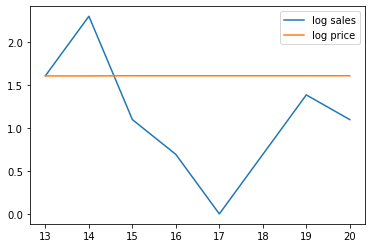

In [66]:
# testing new high elasticity ones

xyz = df1[df1.prod_id == 21170804].groupby(["prod_id","week"]).agg({"sales_qty":"sum","unit_price":"mean"}).reset_index() #.sort_values(by="week", ascending = True)
plt.plot(xyz["week"] , np.log(xyz["sales_qty"]), label = "log sales")
plt.plot(xyz["week"] , np.log(xyz["unit_price"]), label = "log price")

plt.legend()
plt.show()

# although the log price looks flat, the price increased by 1 cent in the process.

In [67]:
# df1[df1.prod_id == 21170804

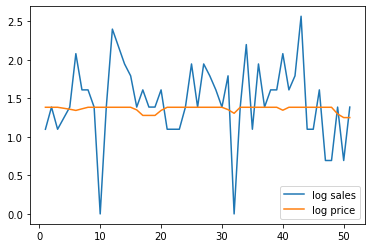

In [68]:

xyz = df1[df1.prod_id == 20976198].groupby(["prod_id","week"]).agg({"sales_qty":"sum","unit_price":"mean"}).reset_index() #.sort_values(by="week", ascending = True)
plt.plot(xyz["week"] , np.log(xyz["sales_qty"]), label = "log sales")
plt.plot(xyz["week"] , np.log(xyz["unit_price"]), label = "log price")

plt.legend()
plt.show()

# Seasonality

In [69]:
#record the percentage that the sales is deviating from average sales


Seasonality = elasticity.groupby(["prod_id"]).sales_qty.mean().reset_index()
Seasonality.columns = ["prod_id","seasonality"]
Seasonality

prod_id  seasonality
0      2.000048e+07     1.225263
1      2.000053e+07     3.750133
2      2.000058e+07     1.938984
3      2.000058e+07     3.188749
4      2.000067e+07     1.944561
...             ...          ...
10066  2.120663e+10     2.267465
10067  2.120793e+10     1.194506
10068  2.120961e+10     2.831480
10069  2.120999e+10     1.251465
10070  2.121537e+10     1.868410

[10071 rows x 2 columns]

In [70]:
# merge it back to the table and calculate Seasonality

elasticity = elasticity.merge(Seasonality, how = "left", on = ["prod_id"])
elasticity["seasonality"] = (elasticity.sales_qty - elasticity.seasonality)/elasticity.seasonality
elasticity
#elasticity of 0 has a seasonality of NaN

prod_id  week  sales_qty  unit_price elasticity  seasonality
0          20000481.0     1   0.000000    1.501853  -4.268167    -1.000000
1          20000481.0     2   0.693147    1.249902  -4.268167    -0.434287
2          20000481.0     3   1.098612    1.249902  -4.268167    -0.103366
3          20000481.0     4   1.791759    1.252763  -4.268167     0.462347
4          20000481.0     5   0.000000    1.501853  -4.268167    -1.000000
...               ...   ...        ...         ...        ...          ...
455102  21215367001.0    44   2.079442    1.515127   4.123367     0.112947
455103  21215367001.0    45   0.693147    1.247032   4.123367    -0.629018
455104  21215367001.0    46   2.772589    1.765587   4.123367     0.483929
455105  21215367001.0    47   2.397895    1.738710   4.123367     0.283388
455106  21215367001.0    48   0.000000    1.085189   4.123367    -1.000000

[455107 rows x 6 columns]

In [71]:
elasticity.head(20)

prod_id  week  sales_qty  unit_price elasticity  seasonality
0   20000481.0     1   0.000000    1.501853  -4.268167    -1.000000
1   20000481.0     2   0.693147    1.249902  -4.268167    -0.434287
2   20000481.0     3   1.098612    1.249902  -4.268167    -0.103366
3   20000481.0     4   1.791759    1.252763  -4.268167     0.462347
4   20000481.0     5   0.000000    1.501853  -4.268167    -1.000000
5   20000481.0     6   0.693147    1.383791  -4.268167    -0.434287
6   20000481.0     7   1.945910    1.252763  -4.268167     0.588157
7   20000481.0     8   0.000000    1.501853  -4.268167    -1.000000
8   20000481.0     9   1.945910    1.252763  -4.268167     0.588157
9   20000481.0    10   1.386294    1.464027  -4.268167     0.131426
10  20000481.0    11   0.693147    1.252763  -4.268167    -0.434287
11  20000481.0    12   0.000000    1.383791  -4.268167    -1.000000
12  20000481.0    14   1.945910    1.298373  -4.268167     0.588157
13  20000481.0    15   1.609438    1.298373  -4.268167     0.313545
14  20000481.0    16   1.098612    1.320422  -4.268167    -0.103366
15  20000481.0    17   1.609438    1.298373  -4.268167     0.313545
16  20000481.0    19   1.386294    1.252763  -4.268167     0.131426
17  20000481.0    20   2.302585    1.252763  -4.268167     0.879258
18  20000481.0    21   1.791759    1.252763  -4.268167     0.462347
19  20000481.0    22   1.386294    1.252763  -4.268167     0.131426

In [73]:
!pip install mlxtend
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [74]:
#find the unique value of transactions that has bought the low-elastic products
dflow = df[df.prod_id.isin(ela_list1)]
trans_idx_low = np.unique(dflow['trans_id']) # 41627 trans idx low
dflow = df[df.trans_id.isin(trans_idx_low)]
dflow.shape

(44807, 19)

In [90]:
dflow.head()

trans_id   trans_dt  store_id         cust_id     prod_id  \
2411   170629010402107209  6/29/2017      1040      1015577350  20189092.0   
4110   170706010210802323   7/6/2017      1021  60002989486540  20189092.0   
4318   170704010902308186   7/4/2017      1090      1129078946  20189092.0   
11500  170727012120202694  7/27/2017      1212      1130959401  20189092.0   
12272  170725010040803603  7/25/2017      1004      1133138645  20189092.0   

       sales_amt  sales_qty  sales_wgt          prod_desc prod_section  \
2411        0.25        5.0        0.0  ACSE PLASTIC BAGS         Home   
4110        0.30        6.0        0.0  ACSE PLASTIC BAGS         Home   
4318        0.05        1.0        0.0  ACSE PLASTIC BAGS         Home   
11500       0.05        1.0        0.0  ACSE PLASTIC BAGS         Home   
12272       0.05        1.0        0.0  ACSE PLASTIC BAGS         Home   

      prod_category prod_subcategory       prod_type prod_mfc_brand_cd  \
2411      Household   Front End Bags  Front End Bags              ACSE   
4110      Household   Front End Bags  Front End Bags              ACSE   
4318      Household   Front End Bags  Front End Bags              ACSE   
11500     Household   Front End Bags  Front End Bags              ACSE   
12272     Household   Front End Bags  Front End Bags              ACSE   

       prod_unit_qty_count prod_count_uom  prod_uom_value  year  unit_price  
2411                   1.0             EA             1.0  2017        0.05  
4110                   1.0             EA             1.0  2017        0.05  
4318                   1.0             EA             1.0  2017        0.05  
11500                  1.0             EA             1.0  2017        0.05  
12272                  1.0             EA             1.0  2017        0.05

In [75]:
#similarly, find the unique value of transactions that has bought the high-elastic products
dfhigh = df[df.prod_id.isin(ela_list2)]
trans_idx_high = np.unique(dfhigh['trans_id']) # 37309 trans idx high
dfhigh = df[df.trans_id.isin(trans_idx_high)]
dfhigh.shape

(46489, 19)

In [76]:
basket_dflow = dflow.groupby(['trans_id','prod_id'])['sales_qty'].sum().unstack().reset_index().fillna(0).set_index('trans_id')
basket_dflow.head() # sum of values of the df is 61705 | 49444 after encoding
# basket_dflow.values.sum()

prod_id             2.000036e+07  2.000053e+07  2.000110e+07  2.000142e+07  \
trans_id                                                                     
170624010000400236           0.0           0.0           0.0           0.0   
170624010010109824           0.0           0.0           0.0           0.0   
170624010011202065           0.0           0.0           0.0           0.0   
170624010032305237           0.0           0.0           0.0           0.0   
170624010040402807           0.0           0.0           0.0           0.0   

prod_id             2.000197e+07  2.000234e+07  2.000342e+07  2.000382e+07  \
trans_id                                                                     
170624010000400236           0.0           0.0           0.0           0.0   
170624010010109824           0.0           0.0           0.0           0.0   
170624010011202065           0.0           0.0           0.0           0.0   
170624010032305237           0.0           0.0           0.0           0.0   
170624010040402807           0.0           0.0           0.0           0.0   

prod_id             2.000449e+07  2.000524e+07  ...  2.108596e+10  \
trans_id                                        ...                 
170624010000400236           0.0           0.0  ...           0.0   
170624010010109824           0.0           0.0  ...           0.0   
170624010011202065           0.0           0.0  ...           0.0   
170624010032305237           0.0           0.0  ...           0.0   
170624010040402807           0.0           0.0  ...           0.0   

prod_id             2.108985e+10  2.109045e+10  2.109233e+10  2.109442e+10  \
trans_id                                                                     
170624010000400236           0.0           0.0           0.0           0.0   
170624010010109824           0.0           0.0           0.0           0.0   
170624010011202065           0.0           0.0           0.0           0.0   
170624010032305237           0.0           0.0           0.0           0.0   
170624010040402807           0.0           0.0           0.0           0.0   

prod_id             2.109701e+10  2.109778e+10  2.110805e+10  2.115435e+10  \
trans_id                                                                     
170624010000400236           0.0           0.0           0.0           0.0   
170624010010109824           0.0           0.0           0.0           0.0   
170624010011202065           0.0           0.0           0.0           0.0   
170624010032305237           0.0           0.0           0.0           0.0   
170624010040402807           0.0           0.0           0.0           0.0   

prod_id             2.115518e+10  
trans_id                          
170624010000400236           0.0  
170624010010109824           0.0  
170624010011202065           0.0  
170624010032305237           0.0  
170624010040402807           0.0  

[5 rows x 4084 columns]

In [77]:
basket_dfhigh = dfhigh.groupby(['trans_id','prod_id'])['sales_qty'].sum().unstack().reset_index().fillna(0).set_index('trans_id')
basket_dfhigh.head() # sum of values of the df is 55373 | 44867 after encoding
# basket_dfhigh.values.sum()

prod_id             2.000000e+07  2.000034e+07  2.000048e+07  2.000053e+07  \
trans_id                                                                     
170624010010901587           0.0           0.0           0.0           0.0   
170624010050206172           0.0           0.0           0.0           0.0   
170624010050404231           0.0           0.0           0.0           0.0   
170624010050609565           0.0           0.0           0.0           0.0   
170624010110406561           0.0           0.0           0.0           0.0   

prod_id             2.000058e+07  2.000058e+07  2.000067e+07  2.000097e+07  \
trans_id                                                                     
170624010010901587           0.0           0.0           0.0           0.0   
170624010050206172           0.0           0.0           0.0           0.0   
170624010050404231           0.0           0.0           0.0           0.0   
170624010050609565           0.0           0.0           0.0           0.0   
170624010110406561           0.0           0.0           0.0           0.0   

prod_id             2.000110e+07  2.000155e+07  ...  2.109701e+10  \
trans_id                                        ...                 
170624010010901587           0.0           0.0  ...           0.0   
170624010050206172           0.0           0.0  ...           0.0   
170624010050404231           0.0           0.0  ...           0.0   
170624010050609565           0.0           0.0  ...           0.0   
170624010110406561           0.0           0.0  ...           0.0   

prod_id             2.109778e+10  2.110805e+10  2.115435e+10  2.115938e+10  \
trans_id                                                                     
170624010010901587           0.0           0.0           0.0           0.0   
170624010050206172           0.0           0.0           0.0           0.0   
170624010050404231           0.0           0.0           0.0           0.0   
170624010050609565           0.0           0.0           0.0           0.0   
170624010110406561           0.0           0.0           0.0           0.0   

prod_id             2.116066e+10  2.116378e+10  2.116395e+10  2.117997e+10  \
trans_id                                                                     
170624010010901587           0.0           0.0           0.0           0.0   
170624010050206172           0.0           0.0           0.0           0.0   
170624010050404231           0.0           0.0           0.0           0.0   
170624010050609565           0.0           0.0           0.0           0.0   
170624010110406561           0.0           0.0           0.0           0.0   

prod_id             2.119422e+10  
trans_id                          
170624010010901587           0.0  
170624010050206172           0.0  
170624010050404231           0.0  
170624010050609565           0.0  
170624010110406561           0.0  

[5 rows x 4212 columns]

In [78]:
basket_dfhigh.describe()

prod_id  2.000000e+07  2.000034e+07  2.000048e+07  2.000053e+07  2.000058e+07  \
count    39349.000000  39349.000000  39349.000000  39349.000000  39349.000000   
mean         0.000051      0.000025      0.004905      0.000076      0.000025   
std          0.007129      0.005041      0.106948      0.011272      0.005041   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      0.000000      0.000000   
50%          0.000000      0.000000      0.000000      0.000000      0.000000   
75%          0.000000      0.000000      0.000000      0.000000      0.000000   
max          1.000000      1.000000      6.000000      2.000000      1.000000   

prod_id  2.000058e+07  2.000067e+07  2.000097e+07  2.000110e+07  2.000155e+07  \
count    39349.000000  39349.000000  39349.000000  39349.000000  39349.000000   
mean         0.034181      0.000025      0.000025      0.000025      0.000254   
std          0.200831      0.005041      0.005041      0.005041      0.050412   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      0.000000      0.000000   
50%          0.000000      0.000000      0.000000      0.000000      0.000000   
75%          0.000000      0.000000      0.000000      0.000000      0.000000   
max          4.000000      1.000000      1.000000      1.000000     10.000000   

prod_id  ...  2.109701e+10  2.109778e+10  2.110805e+10  2.115435e+10  \
count    ...  39349.000000  39349.000000  39349.000000  39349.000000   
mean     ...      0.001245      0.000051      0.000025      0.000025   
std      ...      0.051148      0.007129      0.005041      0.005041   
min      ...      0.000000      0.000000      0.000000      0.000000   
25%      ...      0.000000      0.000000      0.000000      0.000000   
50%      ...      0.000000      0.000000      0.000000      0.000000   
75%      ...      0.000000      0.000000      0.000000      0.000000   
max      ...      3.000000      1.000000      1.000000      1.000000   

prod_id  2.115938e+10  2.116066e+10  2.116378e+10  2.116395e+10  2.117997e+10  \
count    39349.000000  39349.000000  39349.000000  39349.000000  39349.000000   
mean         0.000025      0.000025      0.000025      0.000025      0.000076   
std          0.005041      0.005041      0.005041      0.005041      0.008731   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      0.000000      0.000000   
50%          0.000000      0.000000      0.000000      0.000000      0.000000   
75%          0.000000      0.000000      0.000000      0.000000      0.000000   
max          1.000000      1.000000      1.000000      1.000000      1.000000   

prod_id  2.119422e+10  
count    39349.000000  
mean         0.000025  
std          0.005041  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 4212 columns]

In [79]:
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
 


In [80]:
# Encoding the datasets
basket_encoded_low = basket_dflow.applymap(hot_encode)
basket_dflow = basket_encoded_low

basket_encoded_high = basket_dfhigh.applymap(hot_encode)
basket_dfhigh = basket_encoded_high

In [81]:
basket_dfhigh.head()

prod_id             2.000000e+07  2.000034e+07  2.000048e+07  2.000053e+07  \
trans_id                                                                     
170624010010901587             0             0             0             0   
170624010050206172             0             0             0             0   
170624010050404231             0             0             0             0   
170624010050609565             0             0             0             0   
170624010110406561             0             0             0             0   

prod_id             2.000058e+07  2.000058e+07  2.000067e+07  2.000097e+07  \
trans_id                                                                     
170624010010901587             0             0             0             0   
170624010050206172             0             0             0             0   
170624010050404231             0             0             0             0   
170624010050609565             0             0             0             0   
170624010110406561             0             0             0             0   

prod_id             2.000110e+07  2.000155e+07  ...  2.109701e+10  \
trans_id                                        ...                 
170624010010901587             0             0  ...             0   
170624010050206172             0             0  ...             0   
170624010050404231             0             0  ...             0   
170624010050609565             0             0  ...             0   
170624010110406561             0             0  ...             0   

prod_id             2.109778e+10  2.110805e+10  2.115435e+10  2.115938e+10  \
trans_id                                                                     
170624010010901587             0             0             0             0   
170624010050206172             0             0             0             0   
170624010050404231             0             0             0             0   
170624010050609565             0             0             0             0   
170624010110406561             0             0             0             0   

prod_id             2.116066e+10  2.116378e+10  2.116395e+10  2.117997e+10  \
trans_id                                                                     
170624010010901587             0             0             0             0   
170624010050206172             0             0             0             0   
170624010050404231             0             0             0             0   
170624010050609565             0             0             0             0   
170624010110406561             0             0             0             0   

prod_id             2.119422e+10  
trans_id                          
170624010010901587             0  
170624010050206172             0  
170624010050404231             0  
170624010050609565             0  
170624010110406561             0  

[5 rows x 4212 columns]

In [82]:
basket_dfhigh.index

Int64Index([170624010010901587, 170624010050206172, 170624010050404231,
            170624010050609565, 170624010110406561, 170624010140109390,
            170624010140109504, 170624010140204217, 170624010140503987,
            170624010142501173,
            ...
            191127010272206721, 191127010322602263, 191127010502409271,
            191127010660504527, 191127010830607316, 191127010990301697,
            191127011320300878, 191127011420304699, 191129010270407938,
            191129012000202056],
           dtype='int64', name='trans_id', length=39349)

In [83]:
# Building the model for high elasticity items
frq_items_high = apriori(basket_dfhigh, min_support = 0.0003, use_colnames = True)
 
# Collecting the inferred rules in a dataframe
rules_high = association_rules(frq_items_high, metric ="lift", min_threshold = 1)
rules_high = rules_high.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules_high.head())

    antecedents   consequents  antecedent support  consequent support  \
3  (20189092.0)  (20011985.0)            0.003253            0.073522   
1  (20189092.0)  (20009322.0)            0.003253            0.039340   
0  (20009322.0)  (20189092.0)            0.039340            0.003253   
2  (20011985.0)  (20189092.0)            0.073522            0.003253   

    support  confidence      lift  leverage  conviction  
3  0.000330    0.101562  1.381397  0.000091    1.031211  
1  0.000305    0.093750  2.383055  0.000177    1.060038  
0  0.000305    0.007752  2.383055  0.000177    1.004534  
2  0.000330    0.004494  1.381397  0.000091    1.001246  


In [84]:
frq_items_high

support                     itemsets
0   0.002618                 (20000481.0)
1   0.031310                 (20000584.0)
2   0.004727                 (20001792.0)
3   0.007827                 (20001888.0)
4   0.012986                 (20002342.0)
..       ...                          ...
88  0.000712              (21097012001.0)
89  0.000305     (20009322.0, 20189092.0)
90  0.000330     (20011985.0, 20189092.0)
91  0.000381     (20017001.0, 20189092.0)
92  0.000508  (20017001.0, 20175355001.0)

[93 rows x 2 columns]

In [85]:
rules_high

antecedents   consequents  antecedent support  consequent support  \
3  (20189092.0)  (20011985.0)            0.003253            0.073522   
1  (20189092.0)  (20009322.0)            0.003253            0.039340   
0  (20009322.0)  (20189092.0)            0.039340            0.003253   
2  (20011985.0)  (20189092.0)            0.073522            0.003253   

    support  confidence      lift  leverage  conviction  
3  0.000330    0.101562  1.381397  0.000091    1.031211  
1  0.000305    0.093750  2.383055  0.000177    1.060038  
0  0.000305    0.007752  2.383055  0.000177    1.004534  
2  0.000330    0.004494  1.381397  0.000091    1.001246

In [86]:
# Building the model for low elasticity items
frq_items_low = apriori(basket_dflow, min_support = 0.0002, use_colnames = True)
 
# Collecting the inferred rules in a dataframe
rules_low = association_rules(frq_items_low, metric ="lift", min_threshold = 1)
rules_low = rules_low.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules_low.head())

       antecedents      consequents  antecedent support  consequent support  \
0  (20175355001.0)     (20125267.0)            0.002824            0.110155   
2  (20175355001.0)     (20323751.0)            0.002824            0.067709   
1     (20125267.0)  (20175355001.0)            0.110155            0.002824   
3     (20323751.0)  (20175355001.0)            0.067709            0.002824   

    support  confidence      lift  leverage  conviction  
0  0.000575    0.203704  1.849245  0.000264    1.117480  
2  0.000314    0.111111  1.641003  0.000123    1.048827  
1  0.000575    0.005223  1.849245  0.000264    1.002411  
3  0.000314    0.004635  1.641003  0.000123    1.001819  


In [78]:
# rules_high.to_csv('rules_high.csv', index = False)
# rules_low.to_csv('rules_low.csv', index = False)

In [3]:
high = pd.read_csv('rules_high.csv')

In [6]:
high.head()

antecedents               consequents  antecedent support  \
0     frozenset({20189092})     frozenset({20009322})            0.002975   
1  frozenset({20175355001})     frozenset({20007312})            0.003243   
2  frozenset({20175355001})     frozenset({20016320})            0.003243   
3     frozenset({20007312})  frozenset({20175355001})            0.059289   
4     frozenset({20016320})  frozenset({20175355001})            0.048594   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.067544  0.000375    0.126126  1.867317  0.000174    1.067037  
1            0.059289  0.000402    0.123967  2.090905  0.000210    1.073831  
2            0.048594  0.000322    0.099174  2.040853  0.000164    1.056148  
3            0.003243  0.000402    0.006781  2.090905  0.000210    1.003562  
4            0.003243  0.000322    0.006619  2.040853  0.000164    1.003398

In [7]:
low = pd.read_csv('rules_low.csv')
low.head()

antecedents            consequents  antecedent support  \
0  frozenset({20599862})  frozenset({20599700})            0.000264   
1  frozenset({20189092})  frozenset({20312025})            0.003531   
2  frozenset({20312025})  frozenset({20189092})            0.039662   
3  frozenset({20599700})  frozenset({20599862})            0.077330   

   consequent support   support  confidence       lift  leverage  conviction  
0            0.077330  0.000216    0.818182  10.580446  0.000196    5.074687  
1            0.039662  0.000240    0.068027   1.715184  0.000100    1.030436  
2            0.003531  0.000240    0.006057   1.715184  0.000100    1.002541  
3            0.000264  0.000216    0.002796  10.580446  0.000196    1.002539

# cost

In [219]:
#for cost we are assuming cost is the min price across weeks
cost = elasticity.groupby(['prod_id']).agg({'unit_price':['min']})
cost.columns = ['cost']
cost = cost.reset_index()
cost

prod_id      cost
0      2.000048e+07  1.095273
1      2.000053e+07 -0.159699
2      2.000058e+07 -0.030459
3      2.000058e+07  1.311969
4      2.000067e+07  1.242713
...             ...       ...
10066  2.120663e+10  2.041443
10067  2.120793e+10  1.702017
10068  2.120961e+10  1.588360
10069  2.120999e+10 -0.400478
10070  2.121537e+10  1.085189

[10071 rows x 2 columns]

In [221]:
#merge it to our elasticity table
elasticity4 = elasticity3.merge(cost, how="inner", on="prod_id")

elasticity4.head()

prod_id  week  sales_qty  unit_price elasticity  seasonality  \
0  20000481.0     1   0.000000    1.501853  -4.268167    -1.000000   
1  20000481.0     5   0.000000    1.501853  -4.268167    -1.000000   
2  20000481.0     6   0.693147    1.383791  -4.268167    -0.434287   
3  20000481.0     8   0.000000    1.501853  -4.268167    -1.000000   
4  20000481.0    10   1.386294    1.464027  -4.268167     0.131426   

   mean_unit_price  max_unit_price discounted_price      cost  
0         1.314448        1.501853         1.314448  1.095273  
1         1.314448        1.501853         1.314448  1.095273  
2         1.314448        1.501853         1.314448  1.095273  
3         1.314448        1.501853         1.314448  1.095273  
4         1.314448        1.501853         1.314448  1.095273

## discount

In [222]:
#testing
elasticity

prod_id  week  sales_qty  unit_price elasticity  seasonality
0          20000481.0     1   0.000000    1.501853  -4.268167    -1.000000
1          20000481.0     2   0.693147    1.249902  -4.268167    -0.434287
2          20000481.0     3   1.098612    1.249902  -4.268167    -0.103366
3          20000481.0     4   1.791759    1.252763  -4.268167     0.462347
4          20000481.0     5   0.000000    1.501853  -4.268167    -1.000000
...               ...   ...        ...         ...        ...          ...
455102  21215367001.0    44   2.079442    1.515127   4.123367     0.112947
455103  21215367001.0    45   0.693147    1.247032   4.123367    -0.629018
455104  21215367001.0    46   2.772589    1.765587   4.123367     0.483929
455105  21215367001.0    47   2.397895    1.738710   4.123367     0.283388
455106  21215367001.0    48   0.000000    1.085189   4.123367    -1.000000

[455107 rows x 6 columns]

In [223]:
#testing
elasticity[elasticity['prod_id'] == 20000481.0]

prod_id  week  sales_qty  unit_price elasticity  seasonality
0   20000481.0     1   0.000000    1.501853  -4.268167    -1.000000
1   20000481.0     2   0.693147    1.249902  -4.268167    -0.434287
2   20000481.0     3   1.098612    1.249902  -4.268167    -0.103366
3   20000481.0     4   1.791759    1.252763  -4.268167     0.462347
4   20000481.0     5   0.000000    1.501853  -4.268167    -1.000000
5   20000481.0     6   0.693147    1.383791  -4.268167    -0.434287
6   20000481.0     7   1.945910    1.252763  -4.268167     0.588157
7   20000481.0     8   0.000000    1.501853  -4.268167    -1.000000
8   20000481.0     9   1.945910    1.252763  -4.268167     0.588157
9   20000481.0    10   1.386294    1.464027  -4.268167     0.131426
10  20000481.0    11   0.693147    1.252763  -4.268167    -0.434287
11  20000481.0    12   0.000000    1.383791  -4.268167    -1.000000
12  20000481.0    14   1.945910    1.298373  -4.268167     0.588157
13  20000481.0    15   1.609438    1.298373  -4.268167     0.313545
14  20000481.0    16   1.098612    1.320422  -4.268167    -0.103366
15  20000481.0    17   1.609438    1.298373  -4.268167     0.313545
16  20000481.0    19   1.386294    1.252763  -4.268167     0.131426
17  20000481.0    20   2.302585    1.252763  -4.268167     0.879258
18  20000481.0    21   1.791759    1.252763  -4.268167     0.462347
19  20000481.0    22   1.386294    1.252763  -4.268167     0.131426
20  20000481.0    23   2.079442    1.252763  -4.268167     0.697139
21  20000481.0    24   0.693147    1.252763  -4.268167    -0.434287
22  20000481.0    26   1.386294    1.095273  -4.268167     0.131426
23  20000481.0    27   0.693147    1.252763  -4.268167    -0.434287
24  20000481.0    28   2.079442    1.280378  -4.268167     0.697139
25  20000481.0    29   1.945910    1.333421  -4.268167     0.588157
26  20000481.0    30   1.386294    1.252763  -4.268167     0.131426
27  20000481.0    31   1.386294    1.252763  -4.268167     0.131426
28  20000481.0    32   0.693147    1.252763  -4.268167    -0.434287
29  20000481.0    33   1.098612    1.320422  -4.268167    -0.103366
30  20000481.0    34   1.945910    1.216395  -4.268167     0.588157
31  20000481.0    35   1.791759    1.137031  -4.268167     0.462347
32  20000481.0    36   1.791759    1.252763  -4.268167     0.462347
33  20000481.0    37   1.386294    1.252763  -4.268167     0.131426
34  20000481.0    39   1.098612    1.385044  -4.268167    -0.103366
35  20000481.0    40   1.386294    1.341994  -4.268167     0.131426
36  20000481.0    41   1.791759    1.298373  -4.268167     0.462347
37  20000481.0    42   2.079442    1.251333  -4.268167     0.697139
38  20000481.0    43   0.693147    1.383791  -4.268167    -0.434287
39  20000481.0    44   0.000000    1.383791  -4.268167    -1.000000
40  20000481.0    45   0.000000    1.501853  -4.268167    -1.000000
41  20000481.0    46   1.098612    1.385044  -4.268167    -0.103366
42  20000481.0    47   1.098612    1.385044  -4.268167    -0.103366
43  20000481.0    49   0.693147    1.386294  -4.268167    -0.434287
44  20000481.0    50   0.693147    1.386294  -4.268167    -0.434287
45  20000481.0    51   1.609438    1.425515  -4.268167     0.313545
46  20000481.0    52   1.609438    1.385044  -4.268167     0.313545

In [224]:
#we need to group by prod id and get the mean and max prices before we can see how much discount there was across
#all weeks and all stores
discount = elasticity.groupby(['prod_id']).agg({'unit_price':['mean', 'max']})
discount.columns = ['mean_unit_price', 'max_unit_price']
discount = discount.reset_index()
discount

prod_id  mean_unit_price  max_unit_price
0      2.000048e+07         1.314448        1.501853
1      2.000053e+07        -0.072041        0.044182
2      2.000058e+07         1.074693        1.383791
3      2.000058e+07         1.609326        1.790091
4      2.000067e+07         1.481714        1.569508
...             ...              ...             ...
10066  2.120663e+10         2.084452        2.109000
10067  2.120793e+10         1.731679        1.790091
10068  2.120961e+10         1.597898        1.607436
10069  2.120999e+10         0.472748        0.958392
10070  2.121537e+10         1.509230        1.765587

[10071 rows x 3 columns]

In [249]:
discount[discount['prod_id'] == 21102877.0]
#test

prod_id  mean_unit_price  max_unit_price
6094  21102877.0         1.323812         2.91723

In [226]:
#merge it to our elasticity table
elasticity2 = elasticity.merge(discount, how="inner", on="prod_id")

elasticity2.head()

prod_id  week  sales_qty  unit_price elasticity  seasonality  \
0  20000481.0     1   0.000000    1.501853  -4.268167    -1.000000   
1  20000481.0     2   0.693147    1.249902  -4.268167    -0.434287   
2  20000481.0     3   1.098612    1.249902  -4.268167    -0.103366   
3  20000481.0     4   1.791759    1.252763  -4.268167     0.462347   
4  20000481.0     5   0.000000    1.501853  -4.268167    -1.000000   

   mean_unit_price  max_unit_price  
0         1.314448        1.501853  
1         1.314448        1.501853  
2         1.314448        1.501853  
3         1.314448        1.501853  
4         1.314448        1.501853

In [227]:
elasticity2

prod_id  week  sales_qty  unit_price elasticity  seasonality  \
0          20000481.0     1   0.000000    1.501853  -4.268167    -1.000000   
1          20000481.0     2   0.693147    1.249902  -4.268167    -0.434287   
2          20000481.0     3   1.098612    1.249902  -4.268167    -0.103366   
3          20000481.0     4   1.791759    1.252763  -4.268167     0.462347   
4          20000481.0     5   0.000000    1.501853  -4.268167    -1.000000   
...               ...   ...        ...         ...        ...          ...   
455102  21215367001.0    44   2.079442    1.515127   4.123367     0.112947   
455103  21215367001.0    45   0.693147    1.247032   4.123367    -0.629018   
455104  21215367001.0    46   2.772589    1.765587   4.123367     0.483929   
455105  21215367001.0    47   2.397895    1.738710   4.123367     0.283388   
455106  21215367001.0    48   0.000000    1.085189   4.123367    -1.000000   

        mean_unit_price  max_unit_price  
0              1.314448        1.501853  
1              1.314448        1.501853  
2              1.314448        1.501853  
3              1.314448        1.501853  
4              1.314448        1.501853  
...                 ...             ...  
455102         1.509230        1.765587  
455103         1.509230        1.765587  
455104         1.509230        1.765587  
455105         1.509230        1.765587  
455106         1.509230        1.765587  

[455107 rows x 8 columns]

In [228]:
#calculate discount in ratio
#we are using an if statement to make sure we only get the actual discounts, do not care when the unit price is larger than the avg price
elasticity2["discounted_price"] = np.where(elasticity2.unit_price>elasticity2.mean_unit_price, elasticity2.mean_unit_price, None)
elasticity2

prod_id  week  sales_qty  unit_price elasticity  seasonality  \
0          20000481.0     1   0.000000    1.501853  -4.268167    -1.000000   
1          20000481.0     2   0.693147    1.249902  -4.268167    -0.434287   
2          20000481.0     3   1.098612    1.249902  -4.268167    -0.103366   
3          20000481.0     4   1.791759    1.252763  -4.268167     0.462347   
4          20000481.0     5   0.000000    1.501853  -4.268167    -1.000000   
...               ...   ...        ...         ...        ...          ...   
455102  21215367001.0    44   2.079442    1.515127   4.123367     0.112947   
455103  21215367001.0    45   0.693147    1.247032   4.123367    -0.629018   
455104  21215367001.0    46   2.772589    1.765587   4.123367     0.483929   
455105  21215367001.0    47   2.397895    1.738710   4.123367     0.283388   
455106  21215367001.0    48   0.000000    1.085189   4.123367    -1.000000   

        mean_unit_price  max_unit_price discounted_price  
0              1.314448        1.501853         1.314448  
1              1.314448        1.501853             None  
2              1.314448        1.501853             None  
3              1.314448        1.501853             None  
4              1.314448        1.501853         1.314448  
...                 ...             ...              ...  
455102         1.509230        1.765587          1.50923  
455103         1.509230        1.765587             None  
455104         1.509230        1.765587          1.50923  
455105         1.509230        1.765587          1.50923  
455106         1.509230        1.765587             None  

[455107 rows x 9 columns]

In [229]:
#drop na, we dont need it
elasticity3 = elasticity2.dropna(subset=['discounted_price'], how='all')
elasticity3

prod_id  week  sales_qty  unit_price elasticity  seasonality  \
0          20000481.0     1   0.000000    1.501853  -4.268167    -1.000000   
4          20000481.0     5   0.000000    1.501853  -4.268167    -1.000000   
5          20000481.0     6   0.693147    1.383791  -4.268167    -0.434287   
7          20000481.0     8   0.000000    1.501853  -4.268167    -1.000000   
9          20000481.0    10   1.386294    1.464027  -4.268167     0.131426   
...               ...   ...        ...         ...        ...          ...   
455100  21215367001.0    42   2.302585    1.606233   4.123367     0.232377   
455101  21215367001.0    43   2.833213    1.606728   4.123367     0.516377   
455102  21215367001.0    44   2.079442    1.515127   4.123367     0.112947   
455104  21215367001.0    46   2.772589    1.765587   4.123367     0.483929   
455105  21215367001.0    47   2.397895    1.738710   4.123367     0.283388   

        mean_unit_price  max_unit_price discounted_price  
0              1.314448        1.501853         1.314448  
4              1.314448        1.501853         1.314448  
5              1.314448        1.501853         1.314448  
7              1.314448        1.501853         1.314448  
9              1.314448        1.501853         1.314448  
...                 ...             ...              ...  
455100         1.509230        1.765587          1.50923  
455101         1.509230        1.765587          1.50923  
455102         1.509230        1.765587          1.50923  
455104         1.509230        1.765587          1.50923  
455105         1.509230        1.765587          1.50923  

[251385 rows x 9 columns]

In [201]:
#too see the big picture of the final elasticity table
elasticity3.describe()


week      sales_qty     unit_price    seasonality  \
count  251385.000000  251385.000000  251385.000000  251385.000000   
mean       26.668075       1.887157       1.425256      -0.056775   
std        15.055686       1.035522       0.585893       0.395592   
min         1.000000       0.000000      -1.108663      -1.000000   
25%        14.000000       1.098612       1.080448      -0.236335   
50%        27.000000       1.791759       1.408545      -0.018437   
75%        40.000000       2.484907       1.790091       0.158919   
max        52.000000       8.048788       4.651386       3.016783   

       mean_unit_price  max_unit_price  
count    251385.000000   251385.000000  
mean          1.341565        1.529919  
std           0.585318        0.588913  
min          -1.568660       -1.078810  
25%           0.997262        1.190888  
50%           1.346636        1.501853  
75%           1.698761        1.885553  
max           4.225747        4.651386

#  Modeling

In [231]:
elasticity4

prod_id  week  sales_qty  unit_price elasticity  seasonality  \
0          20000481.0     1   0.000000    1.501853  -4.268167    -1.000000   
1          20000481.0     5   0.000000    1.501853  -4.268167    -1.000000   
2          20000481.0     6   0.693147    1.383791  -4.268167    -0.434287   
3          20000481.0     8   0.000000    1.501853  -4.268167    -1.000000   
4          20000481.0    10   1.386294    1.464027  -4.268167     0.131426   
...               ...   ...        ...         ...        ...          ...   
251380  21215367001.0    42   2.302585    1.606233   4.123367     0.232377   
251381  21215367001.0    43   2.833213    1.606728   4.123367     0.516377   
251382  21215367001.0    44   2.079442    1.515127   4.123367     0.112947   
251383  21215367001.0    46   2.772589    1.765587   4.123367     0.483929   
251384  21215367001.0    47   2.397895    1.738710   4.123367     0.283388   

        mean_unit_price  max_unit_price discounted_price      cost  
0              1.314448        1.501853         1.314448  1.095273  
1              1.314448        1.501853         1.314448  1.095273  
2              1.314448        1.501853         1.314448  1.095273  
3              1.314448        1.501853         1.314448  1.095273  
4              1.314448        1.501853         1.314448  1.095273  
...                 ...             ...              ...       ...  
251380         1.509230        1.765587          1.50923  1.085189  
251381         1.509230        1.765587          1.50923  1.085189  
251382         1.509230        1.765587          1.50923  1.085189  
251383         1.509230        1.765587          1.50923  1.085189  
251384         1.509230        1.765587          1.50923  1.085189  

[251385 rows x 10 columns]

In [258]:
# we need to do a logit regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [259]:
#elasticity 3, which is our final df, is our train data for the model
train = elasticity4
train

prod_id  week  sales_qty  unit_price elasticity  seasonality  \
0          20000481.0     1   0.000000    1.501853  -4.268167    -1.000000   
1          20000481.0     5   0.000000    1.501853  -4.268167    -1.000000   
2          20000481.0     6   0.693147    1.383791  -4.268167    -0.434287   
3          20000481.0     8   0.000000    1.501853  -4.268167    -1.000000   
4          20000481.0    10   1.386294    1.464027  -4.268167     0.131426   
...               ...   ...        ...         ...        ...          ...   
251380  21215367001.0    42   2.302585    1.606233   4.123367     0.232377   
251381  21215367001.0    43   2.833213    1.606728   4.123367     0.516377   
251382  21215367001.0    44   2.079442    1.515127   4.123367     0.112947   
251383  21215367001.0    46   2.772589    1.765587   4.123367     0.483929   
251384  21215367001.0    47   2.397895    1.738710   4.123367     0.283388   

        mean_unit_price  max_unit_price discounted_price      cost  
0              1.314448        1.501853         1.314448  1.095273  
1              1.314448        1.501853         1.314448  1.095273  
2              1.314448        1.501853         1.314448  1.095273  
3              1.314448        1.501853         1.314448  1.095273  
4              1.314448        1.501853         1.314448  1.095273  
...                 ...             ...              ...       ...  
251380         1.509230        1.765587          1.50923  1.085189  
251381         1.509230        1.765587          1.50923  1.085189  
251382         1.509230        1.765587          1.50923  1.085189  
251383         1.509230        1.765587          1.50923  1.085189  
251384         1.509230        1.765587          1.50923  1.085189  

[251385 rows x 10 columns]

In [276]:
#fit the model using the respective x values and y value
model = lr.fit(X = train.loc[:,['unit_price', 'elasticity', 'seasonality', 'discounted_price', 'cost']], y = train.sales_qty)

In [277]:
#model coeficient
model.coef_

array([-8.10435960e-03,  1.31126992e-03,  1.52590836e+00, -7.01732274e-01,
        5.58276476e-01])

In [278]:
#model intercept
model.intercept_

2.3587380922012984

# trying the model on a sample product from our list of low elastic products

In [263]:
optimize = elasticity4

In [264]:
optimize.columns

Index(['prod_id', 'week', 'sales_qty', 'unit_price', 'elasticity',
       'seasonality', 'mean_unit_price', 'max_unit_price', 'discounted_price',
       'cost'],
      dtype='object')

In [265]:
tmp = optimize.groupby(["prod_id"]).agg({'sales_qty':'mean','seasonality':'mean', 'elasticity':'mean', 'discounted_price':'mean', 'cost':'mean'}).reset_index()

In [266]:
tmp

prod_id  sales_qty  seasonality  elasticity  discounted_price  \
0      2.000048e+07   0.810151    -0.338794   -4.268167          1.314448   
1      2.000053e+07   3.811260     0.016300    1.091462         -0.072041   
2      2.000058e+07   1.796713    -0.073374    0.148263          1.074693   
3      2.000058e+07   3.060462    -0.040231   -1.258475          1.609326   
4      2.000067e+07   1.938117    -0.003314   -0.345786          1.481714   
...             ...        ...          ...         ...               ...   
10026  2.120663e+10   1.609438    -0.290204  -30.396271          2.084452   
10027  2.120793e+10   0.000000    -1.000000  -20.447843          1.731679   
10028  2.120961e+10   2.484907    -0.122400  -36.336614          1.597898   
10029  2.120999e+10   0.866434    -0.307664   -0.405119          0.472748   
10030  2.121537e+10   2.477145     0.325804    4.123367          1.509230   

           cost  
0      1.095273  
1     -0.159699  
2     -0.030459  
3      1.311969  
4      1.242713  
...         ...  
10026  2.041443  
10027  1.702017  
10028  1.588360  
10029 -0.400478  
10030  1.085189  

[10031 rows x 6 columns]

In [267]:
#example
#optimizing the price for product id 21102877.0 to
PI=21102877.0
train1 = elasticity4.loc[(elasticity4.prod_id == PI),:]
model1 = lr.fit(X = train.loc[:,['seasonality', 'discounted_price', 'unit_price', 'elasticity']], y = train.sales_qty)


In [270]:
print(model1.coef_)
print(model1.intercept_)


[ 1.50361251e+00  3.99963696e-01 -5.43272524e-01 -1.10300869e-03]
2.2086713233935042


In [271]:
#get the actual value from the tmp table and multiply it by our models coeficient
seasonality = tmp.loc[(tmp.prod_id == PI),"seasonality"].values[0] * model.coef_[0]
discounted_price = tmp.loc[(tmp.prod_id == PI),"discounted_price"].values[0] * model.coef_[1]
elasticity = tmp.loc[ (tmp.prod_id == PI),"elasticity"].values[0] * model.coef_[3]

In [273]:
import scipy

list = []
for i in np.arange(0.01, 15, 0.01):
    d = seasonality + discounted_price + elasticity * i
    d = scipy.special.expit(d)
    list.append(d*i - d*cost)

In [274]:
op = pd.DataFrame([np.arange(0.01, 15, 0.01),list]).T
op.columns = ["price","profit"]

In [ ]:
'''
#trying to get the profit curve to find the "sweet spot"
sns.lineplot(data = op, x = "price", y = "profit");
'''